In [24]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os
print os.getcwd();

/home/gustavo/Desktop/P3A/Notebooks


In [3]:
# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import libraries for agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

## Reading data

In [121]:
df = pd.read_csv('Dados.csv')

## Building new dataframe with only numerical features

In [154]:
df2 = df.select_dtypes(include=['number'])
positions = df.PosicAbbrev
positions = positions.str.strip()
positions = positions.as_matrix()
le = preprocessing.LabelEncoder()
newpos = le.fit_transform(positions)

In [155]:
df2.iloc[:,5:] = df2.iloc[:,5:].div(df["MIN"], axis=0)
df2[["FG%","3P%","FT%"]] = df2[["FG%","3P%","FT%"]].multiply(df2["MIN"], axis = 0)

In [156]:
#Removing columns
columnstoignore = [0,1,4,6,7,9,10,12,13,17]
df2.drop(df2.columns[columnstoignore], axis=1, inplace=True)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Applying agglomerative clustering method

In [37]:
model = AgglomerativeClustering(linkage='ward', n_clusters=5)
model.fit(df2)
ward_labels = model.labels_

## Applying another agglomerative clustering method

In [101]:
model = AgglomerativeClustering(linkage='average', n_clusters=5)
model.fit(df2)
average_labels = model.labels_

## Applying a third agglomerative clustering method

In [39]:
model = AgglomerativeClustering(linkage='complete', n_clusters=5)
model.fit(df2)
complete_labels = model.labels_

## Applying Kmeans clustering method

In [40]:
from sklearn.cluster import KMeans

In [41]:
estimator = KMeans(n_clusters=5)
estimator.fit(df2)
kmeans_labels = estimator.labels_

## Applying spectral clustering method

In [42]:
from sklearn.cluster import spectral_clustering

In [43]:
sc_labels = spectral_clustering(df2, n_clusters=5, eigen_solver='arpack')

ValueError: array must be 2-dimensional and square. shape = (476, 26)

## Applying PCA

In [44]:
#import libraries from features decomposition
from sklearn import decomposition

In [157]:
df2 = df2.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#df2 = min_max_scaler.fit_transform(df2)
df2 = preprocessing.scale(df2)
pca = decomposition.PCA(n_components=3)
pca.fit(df2)
reduced_df = pca.transform(df2)
pca.explained_variance_ratio_

array([ 0.22517331,  0.17650361,  0.10954056])

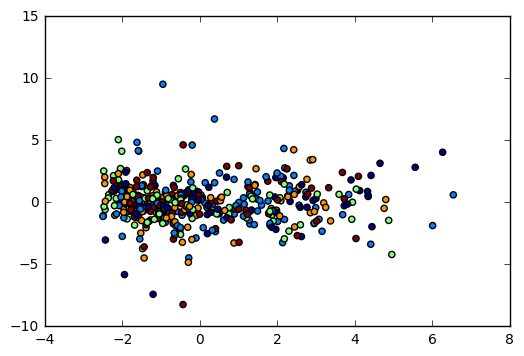

In [158]:
plt.scatter(reduced_df[:,0],reduced_df[:,1],c = newpos)

## Ploting reduced dataset with ward agglomerative clustering labels

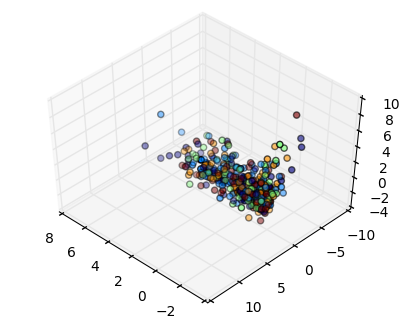

In [159]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=newpos)

## Ploting reduced dataset with average agglomerative clustering labels

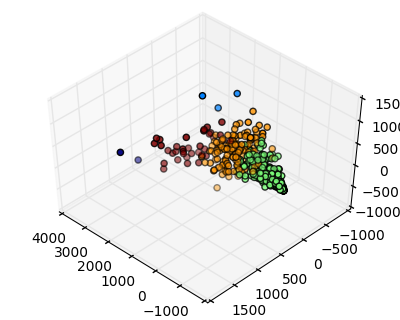

In [18]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=average_labels)

## Ploting reduced dataset with complete agglomerative clustering labels

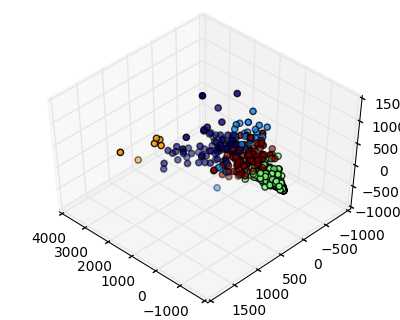

In [19]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=complete_labels)

## Ploting reduced dataset with kmeans clustering labels

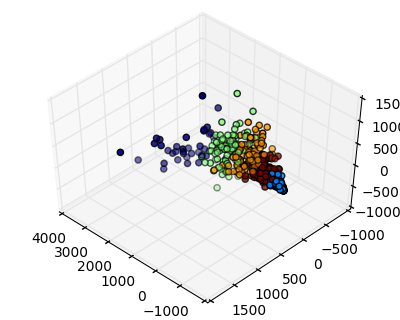

In [20]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=kmeans_labels)

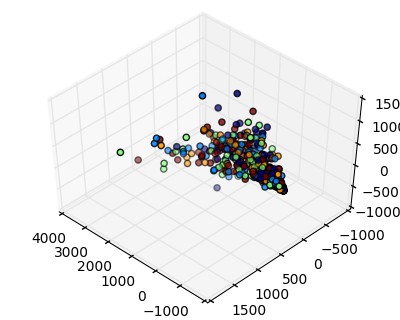

In [27]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(reduced_df[:, 0], reduced_df[:, 1], reduced_df[:, 2], c=newpos)